In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read and check data

In [3]:
df = pd.read_csv('data.csv')
df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


In [4]:
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

# See distribution of Purchases

/var/folders/5k/sjwwd0rj5cx9swsd9y1mfdzm0000gn/T/ipykernel_65473/797648368.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['Purchase'], palette='bright')


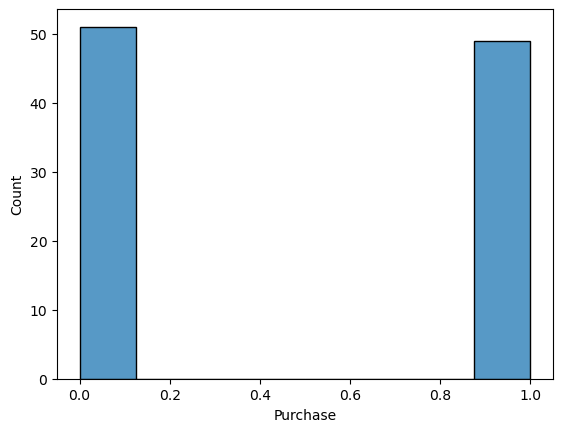

In [16]:
# histogram of System Usability Survery (SUS) score
sns.histplot(data=df['Purchase'], palette='bright')
plt.show()

# Prep and label data for model training

In [17]:
# label
y = df['Purchase'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [18]:
X = df.drop('Purchase', axis = 1).to_numpy()
X

array([[ 84, 254,   0,   3,   2],
       [ 58, 247,   0,   6,   9],
       [ 56, 125,   1,   6,   8],
       [ 55,  22,   0,  11,   7],
       [ 95, 262,   0,   2,   3],
       [ 71, 113,   1,   8,   9],
       [ 76,  91,   1,   6,   3],
       [ 64,  46,   0,   6,  11],
       [ 56, 132,   0,   9,   9],
       [ 96, 190,   0,  11,   4],
       [ 56, 146,   0,   9,   7],
       [ 80, 226,   0,   4,   4],
       [ 72,  54,   1,   7,   9],
       [ 81, 104,   0,   2,   3],
       [ 72, 292,   0,   7,   3],
       [ 66, 126,   0,   8,   9],
       [ 89, 152,   1,   3,   5],
       [ 80, 221,   0,   3,   4],
       [ 66,  51,   0,   9,   9],
       [ 74, 230,   0,   6,   8],
       [ 74,  72,   1,   6,   8],
       [ 68, 284,   0,   6,  11],
       [ 96, 168,   0,   2,   4],
       [ 98, 194,   0,   1,   3],
       [ 86, 130,   1,  10,   1],
       [ 58, 227,   0,   9,   3],
       [ 75, 161,   1,   7,   8],
       [ 86, 262,   1,   2,   3],
       [ 65, 257,   1,   9,  11],
       [ 80,  

# Data Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

# Import Classifiers and Metrics from Sklearn

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [13]:
lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Train ML model with training dataset with model.fit() function

In [14]:
lc.fit(X_train, y_train)
neigh.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Test model with test dataset

In [15]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

/Users/yannalin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
